<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Buy_and_Hold_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%pip install yfinance


     |████████████████████████████████| 6.4 MB 9.8 MB/s 
     |████████████████████████████████| 63 kB 289 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Using Yahoo finance to retrive data

In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
start = dt.datetime.today()-dt.timedelta(6000)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker,start,end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df = cl_price.iloc[: , :1]
df

,AMZN
Date,
2005-08-24,42.369999
2005-08-25,42.310001
2005-08-26,42.369999
2005-08-29,42.790001
2005-08-30,42.490002
...,...
2022-01-21,2852.860107
2022-01-24,2890.879883
2022-01-25,2799.719971


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4136 entries, 2005-08-24 to 2022-01-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    4136 non-null   float64
dtypes: float64(1)
memory usage: 64.6 KB


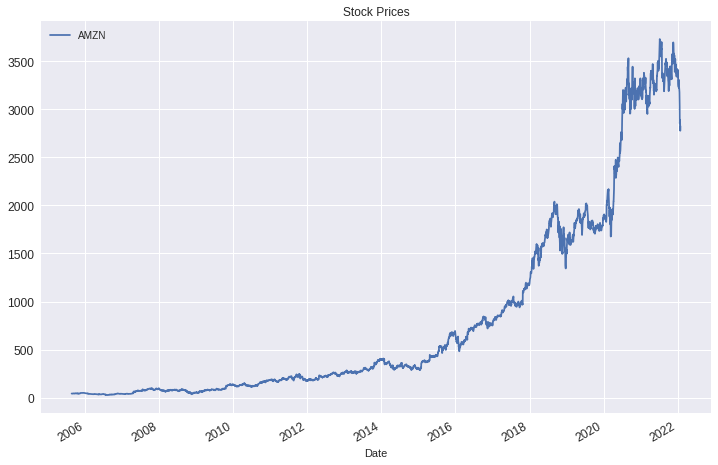

In [ ]:
df.plot(figsize = (12, 8), title = "Stock Prices", fontsize = 12)
plt.show()

In [ ]:
df["returns"] = np.log(df.div(df.shift(1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns
Date,,
2005-08-24,42.369999,NaN
2005-08-25,42.310001,-0.001417
2005-08-26,42.369999,0.001417
2005-08-29,42.790001,0.009864
2005-08-30,42.490002,-0.007036
...,...,...
2022-01-21,2852.860107,-0.061346
2022-01-24,2890.879883,0.013239
2022-01-25,2799.719971,-0.032042


## A simple Buy and Hold "Strategy"

In [ ]:
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns
Date,,
2005-08-25,42.310001,-0.001417
2005-08-26,42.369999,0.001417
2005-08-29,42.790001,0.009864
2005-08-30,42.490002,-0.007036
2005-08-31,42.700001,0.004930
...,...,...
2022-01-21,2852.860107,-0.061346
2022-01-24,2890.879883,0.013239
2022-01-25,2799.719971,-0.032042


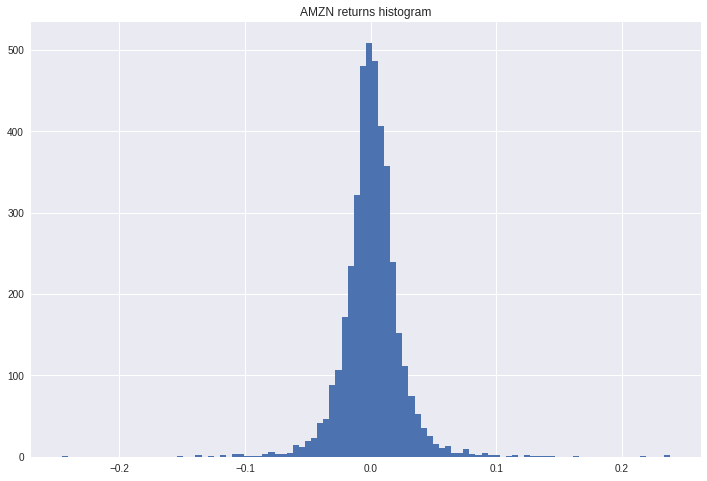

In [ ]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("AMZN returns histogram")
plt.show()

In [ ]:
df.returns.sum()

4.1997823988151195

In [ ]:
np.exp(df.returns.sum())

66.67182159496888

In [ ]:
df.AMZN[-1] / df.AMZN[0]

66.76636535277653

In [ ]:
df.returns.cumsum().apply(np.exp)

Date
2005-08-25     0.998584
2005-08-26     1.000000
2005-08-29     1.009913
2005-08-30     1.002832
2005-08-31     1.007789
                ...    
2022-01-21    67.332079
2022-01-24    68.229407
2022-01-25    66.077886
2022-01-26    65.552278
2022-01-27    66.671822
Name: returns, Length: 4135, dtype: float64

In [ ]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns,creturns
Date,,,
2005-08-25,42.310001,-0.001417,0.998584
2005-08-26,42.369999,0.001417,1.000000
2005-08-29,42.790001,0.009864,1.009913
2005-08-30,42.490002,-0.007036,1.002832
2005-08-31,42.700001,0.004930,1.007789
...,...,...,...
2022-01-21,2852.860107,-0.061346,67.332079
2022-01-24,2890.879883,0.013239,68.229407
2022-01-25,2799.719971,-0.032042,66.077886


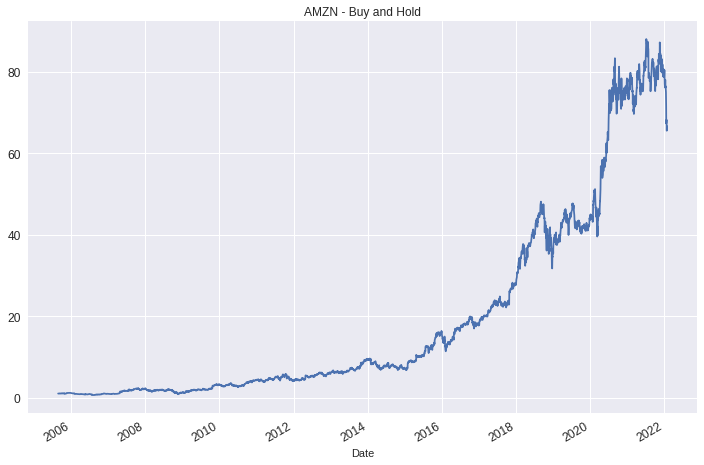

In [ ]:
df.creturns.plot(figsize = (12, 8), title = "AMZN - Buy and Hold", fontsize = 12)
plt.show()

#Performance Metrics

In [ ]:
df

,AMZN,returns,creturns
Date,,,
2005-08-25,42.310001,-0.001417,0.998584
2005-08-26,42.369999,0.001417,1.000000
2005-08-29,42.790001,0.009864,1.009913
2005-08-30,42.490002,-0.007036,1.002832
2005-08-31,42.700001,0.004930,1.007789
...,...,...,...
2022-01-21,2852.860107,-0.061346,67.332079
2022-01-24,2890.879883,0.013239,68.229407
2022-01-25,2799.719971,-0.032042,66.077886


In [ ]:
df.creturns.iloc[-1] # absolute Performance 

66.67182159496923

In [ ]:
df.returns.sum() # absolute Performance

4.1997823988151195

In [ ]:
df.describe()

,AMZN,returns,creturns
count,4135.000000,4135.000000,4135.000000
mean,809.712207,0.001016,19.110508
std,1006.333081,0.023657,23.751076
min,26.070000,-0.246182,0.615294
25%,94.555000,-0.009532,2.231650
50%,304.910004,0.000755,7.196366
75%,1178.380005,0.012140,27.811660
max,3731.409912,0.238621,88.067265


**annualized mean return and risk**

In [ ]:
df.returns.mean() * 252 # mean return

0.25594804461944654

In [ ]:
df.returns.std() * np.sqrt(252) # risk

0.3755381607510871

**maximum drawdown**

In [ ]:
df["cummax"] = df.creturns.cummax()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns,creturns,cummax
Date,,,,
2005-08-25,42.310001,-0.001417,0.998584,0.998584
2005-08-26,42.369999,0.001417,1.000000,1.000000
2005-08-29,42.790001,0.009864,1.009913,1.009913
2005-08-30,42.490002,-0.007036,1.002832,1.009913
2005-08-31,42.700001,0.004930,1.007789,1.009913
...,...,...,...,...
2022-01-21,2852.860107,-0.061346,67.332079,88.067265
2022-01-24,2890.879883,0.013239,68.229407,88.067265
2022-01-25,2799.719971,-0.032042,66.077886,88.067265


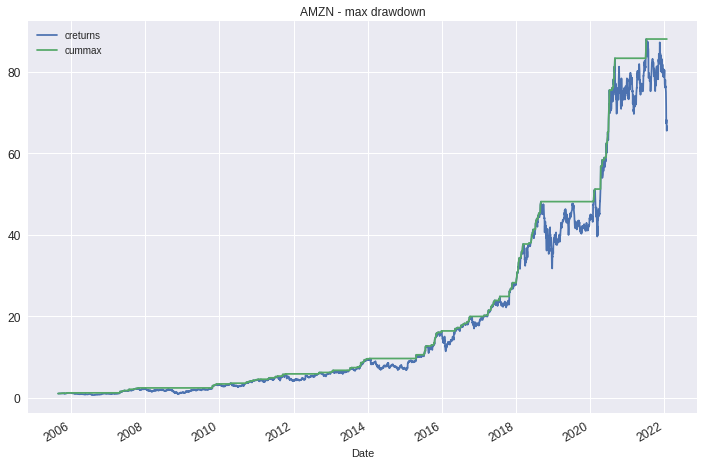

In [ ]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "AMZN - max drawdown", fontsize = 12)
plt.show()

In [ ]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2005-08-25     0.000000
2005-08-26     0.000000
2005-08-29     0.000000
2005-08-30     0.007080
2005-08-31     0.002124
                ...    
2022-01-21    20.735186
2022-01-24    19.837858
2022-01-25    21.989378
2022-01-26    22.514987
2022-01-27    21.395443
Length: 4135, dtype: float64

In [ ]:
drawdown.max() # maximum drawdown

22.514986664765274

In [ ]:
drawdown.idxmax()

Timestamp('2022-01-26 00:00:00')